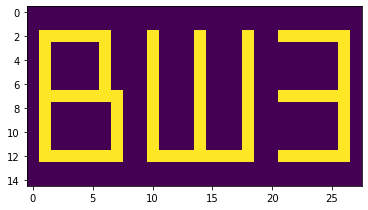

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a = np.zeros((15, 28))
a[2:-2, 1] = 1; a[2, 2:6] = 1
a[2:7, 6] = 1; a[7:-2, 7] = 1
a[7, 2:7] = 1; a[-3, 2:7] = 1
a[2:-2, 10] = 1; a[2:-2, 14] = 1
a[2:-2, 18] = 1; a[-3, 10:19] = 1

a[2, 21:-2] = 1; a[7, 21:-2] = 1
a[12, 21:-2] = 1; a[2:13, -2] = 1 
plt.imshow(a)

In [3]:
U, S, V = np.linalg.svd(a, full_matrices = True)
print(S)


def toFixed(f: float, n=0):
    a, b = str(f).split('.')
    return '{}.{}{}'.format(a, b[:n], '0'*(n-len(b)))

def make_S(s, n, m):
    S = np.zeros((n, m))
    for i in range(s.shape[0]):
        S[i][i] = s[i]
    return S

[8.65821175e+00 4.21505898e+00 2.18518482e+00 1.81299689e+00
 4.54595131e-01 5.36223898e-16 1.92765170e-16 1.79863590e-16
 9.48279124e-17 2.19507633e-17 5.21927194e-32 7.87342887e-33
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


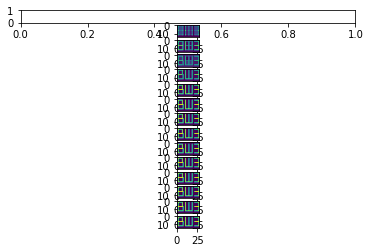

In [9]:
def get_max_eigs(a, n):
    max_ = []
    rez  = np.zeros((len(a)))
    for i in range(len(a)):
        if a[i] > 1e-15:
            max_.append((a[i], i))
        else:
            max_.append((0, i))
    max_ = sorted(max_, reverse = True)
    
    for i in range(n):
        rez[max_[i][1]] = max_[i][0]
    return rez

def clear_matrix(a):
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if a[i][j] <= 1e-15:
                a[i][j] = 0.0
    return a

fig, axes = plt.subplots(15, 1)
for i in range(1, 15):
    #print(S)
    S_ = make_S(get_max_eigs(S, i), 15, 28)
    #print(get_max_eigs(S, i))
    axes[i].imshow(np.dot(U.dot(S_), V)) 
plt.show()
#plt.imshow(np.dot(U.dot(make_S(get_max_eigs(S, 4), 15, 28)), V